170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 99s 1us/step
Category:  [8]


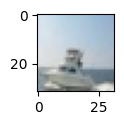

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

cifar_dataset = keras.datasets.cifar10
(train_images, train_labels), (test_images, test_labels) = cifar_dataset.load_data()

print("Category: ", train_labels[100])
plt.figure(figsize=(1,1))
plt.imshow(train_images[100])
plt.show()

In [2]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
import numpy as np
import logging

tf.get_logger().setLevel(logging.ERROR)

EPOCHS = 32
BATCH_SIZE = 32

# Load dataset.
cifar_dataset = keras.datasets.cifar10
(train_images, train_labels), (test_images, test_labels) = cifar_dataset.load_data()

# Standardize dataset.
mean = np.mean(train_images)
stddev = np.std(train_images - mean)
train_images = (train_images - mean) / stddev
test_images = (test_images - mean) / stddev
print('mean:', mean)
print('stddev:', stddev)

# Change labels to one-hot.
train_labels = to_categorical(train_labels, num_classes=10)
test_labels = to_categorical(test_labels, num_classes=10)

# Model with two convolutional and one fully connected layer.
model = Sequential()
model.add(Conv2D(64, (5, 5), strides=(2, 2),
                 activation='relu', padding='same',
                 input_shape=(32, 32, 3),
                 kernel_initializer='he_normal',
                 bias_initializer='zeros'))
model.add(Conv2D(64, (3, 3), strides=(2, 2),
                 activation='relu', padding='same',
                 kernel_initializer='he_normal',
                 bias_initializer='zeros'))
model.add(Flatten())
model.add(Dense(10, activation='softmax',
                kernel_initializer='glorot_uniform',
                bias_initializer='zeros'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])
model.summary()

history = model.fit(
    train_images, train_labels,
    validation_data=(test_images, test_labels),
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=2,
    shuffle=True
)

mean: 120.70756512369792
stddev: 64.1500758911213


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 16, 16, 64)     │         4,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 8, 8, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        40,970 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 82,762 (323.29 KB)

 Trainable params: 82,762 (323.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/32
1563/1563 - 42s - 27ms/step - accuracy: 0.5104 - loss: 1.3864 - val_accuracy: 0.5874 - val_loss: 1.1551
Epoch 2/32
1563/1563 - 41s - 26ms/step - accuracy: 0.6363 - loss: 1.0442 - val_accuracy: 0.6270 - val_loss: 1.0750
Epoch 3/32
1563/1563 - 40s - 26ms/step - accuracy: 0.6861 - loss: 0.9012 - val_accuracy: 0.6385 - val_loss: 1.0524
Epoch 4/32
1563/1563 - 43s - 27ms/step - accuracy: 0.7169 - loss: 0.8080 - val_accuracy: 0.6497 - val_loss: 1.0403
Epoch 5/32
1563/1563 - 40s - 26ms/step - accuracy: 0.7459 - loss: 0.7253 - val_accuracy: 0.6408 - val_loss: 1.1190
Epoch 6/32
1563/1563 - 40s - 26ms/step - accuracy: 0.7675 - loss: 0.6583 - val_accuracy: 0.6511 - val_loss: 1.1265
Epoch 7/32
1563/1563 - 40s - 26ms/step - accuracy: 0.7894 - loss: 0.5952 - val_accuracy: 0.6504 - val_loss: 1.1568
Epoch 8/32
1563/1563 - 40s - 26ms/step - accuracy: 0.8098 - loss: 0.5380 - val_accuracy: 0.6472 - val_loss: 1.2331
Epoch 9/32
1563/1563 - 42s - 27ms/step - accuracy: 0.8233 - loss: 0.4944 - val_a

In [3]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import MaxPooling2D
import numpy as np
import logging

tf.get_logger().setLevel(logging.ERROR)

EPOCHS = 32
BATCH_SIZE = 32

# Load dataset.
cifar_dataset = keras.datasets.cifar10
(train_images, train_labels), (test_images, test_labels) = cifar_dataset.load_data()

# Standardize dataset.
mean = np.mean(train_images)
stddev = np.std(train_images - mean)
train_images = (train_images - mean) / stddev
test_images = (test_images - mean) / stddev
print('mean:', mean)
print('stddev:', stddev)

# Change labels to one-hot.
train_labels = to_categorical(train_labels, num_classes=10)
test_labels = to_categorical(test_labels, num_classes=10)


model = Sequential()
model.add(Conv2D(64, (4, 4), activation='relu', padding='same',
                 input_shape=(32, 32, 3)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (2, 2), activation='relu', padding='same',
                 strides=(2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(Dropout(0.2))

# Continuation of the model (from the second image)
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

# Compile and train the model.
model.compile(loss='categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])
model.summary()
history = model.fit(
    train_images, train_labels,
    validation_data=(test_images, test_labels),
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=2,
    shuffle=True
)

mean: 120.70756512369792
stddev: 64.1500758911213


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 64)     │         3,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 16, 16, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 16, 16, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 8, 8, 32)       │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 8, 8, 32)       │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 4, 4, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 4, 4, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │        32,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 103,434 (404.04 KB)

 Trainable params: 103,434 (404.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/32
1563/1563 - 230s - 147ms/step - accuracy: 0.3296 - loss: 1.7820 - val_accuracy: 0.4416 - val_loss: 1.4914
Epoch 2/32
1563/1563 - 262s - 168ms/step - accuracy: 0.4731 - loss: 1.4398 - val_accuracy: 0.5409 - val_loss: 1.2645
Epoch 3/32
1563/1563 - 224s - 144ms/step - accuracy: 0.5265 - loss: 1.3093 - val_accuracy: 0.5663 - val_loss: 1.1763
Epoch 4/32
1563/1563 - 261s - 167ms/step - accuracy: 0.5579 - loss: 1.2380 - val_accuracy: 0.6201 - val_loss: 1.0755
Epoch 5/32
1563/1563 - 262s - 168ms/step - accuracy: 0.5826 - loss: 1.1791 - val_accuracy: 0.6397 - val_loss: 1.0186
Epoch 6/32
1563/1563 - 225s - 144ms/step - accuracy: 0.6022 - loss: 1.1301 - val_accuracy: 0.6503 - val_loss: 1.0082
Epoch 7/32
1563/1563 - 261s - 167ms/step - accuracy: 0.6125 - loss: 1.0998 - val_accuracy: 0.6520 - val_loss: 0.9855
Epoch 8/32
1563/1563 - 227s - 145ms/step - accuracy: 0.6212 - loss: 1.0819 - val_accuracy: 0.6732 - val_loss: 0.9361
Epoch 9/32
1563/1563 - 222s - 142ms/step - accuracy: 0.6295 - lo